In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'..\Data files\train.csv')
df.drop(['PassengerId'],axis=1,inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# END OF FEATURE ENGINEERING

## ANALYSING TICKET

In [3]:
df['Ticket_extension'] = 0
for i in list(df['Ticket'].values):
    df.loc[df['Ticket'] == i,['Ticket_extension']] = i.split(' ')[0]

#### Ticket is not a good parameter to decide survival rate but the extension can help us to analysis further features

## ANALYSING NAME

### Extracting titles from name it might give us good information about standard

In [4]:
name = [i.split(',')[1].strip() for i in list(df['Name'].values)]
title = []
for i in name:
    extension = i.split('.')[0]
    if extension == 'Mr' or extension == 'Mrs' or extension == 'Miss' or extension == 'Master':
        title.append(extension)
    else:
        title.append('Other')       
df['Title'] = title

In [5]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

### We can say that males had least priority in disaster

C:\Users\Akhilesh\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


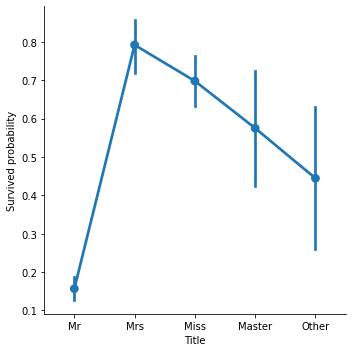

In [6]:
g = sns.factorplot(x='Title',y='Survived',data=df)
g.set_ylabels('Survived probability')

## ANALYSING AGE

<AxesSubplot:>

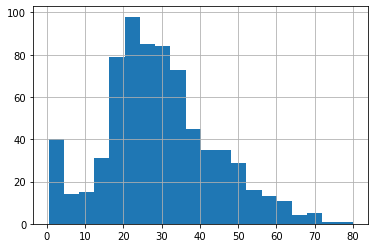

In [7]:
df['Age'].hist(bins=20)

#### Her ticket and other information is matching with entry number 79 thier might be some relation so we can cosider this entry

In [8]:
df.loc[df['Ticket'] == '364516']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_extension,Title
79,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.475,NaN,S,364516,Miss
777,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S,364516,Miss


### Handeling NA values

In [9]:
df['Age'].isna().mean()

0.19865319865319866

In [10]:
new_df = df.copy()
df.loc[df['Age'].isna(),'Title'].value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Other       1
Name: Title, dtype: int64

In [11]:
Mr_mean = round(np.nanmean(new_df.loc[df['Title'] == 'Mr','Age'].values))
Miss_mean = round(np.nanmean(new_df.loc[df['Title'] == 'Miss','Age'].values))
Mrs_mean = round(np.nanmean(new_df.loc[df['Title'] == 'Mrs','Age'].values))
Master_mean = round(np.nanmean(new_df.loc[df['Title'] == 'Master','Age'].values))
Other_mean = round(np.nanmean(new_df.loc[df['Title'] == 'Miss','Age'].values))

In [12]:
for i,y in enumerate(df['Age'].values):  
    if np.isnan(df['Age'][i]):
        y = df['Title'][i]
        if y == 'Mr':
            new_df.loc[i,'Age'] = Mr_mean
        if y == 'Miss':
            new_df.loc[i,'Age'] = Miss_mean 
        if y == 'Mrs':
            new_df.loc[i,'Age'] = Mrs_mean 
        if y == 'Master':
            new_df.loc[i,'Age'] = Master_mean 
        if y == 'Other':
            new_df.loc[i,'Age'] = Other_mean 

In [13]:
new_df['Age type'] = 0
new_df.loc[new_df['Age'] < 16,'Age type'] = 'Child'
new_df.loc[new_df['Age'].between(16,60),'Age type'] = 'Adult'
new_df.loc[new_df['Age'] > 60,'Age type'] = 'Old'

C:\Users\Akhilesh\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


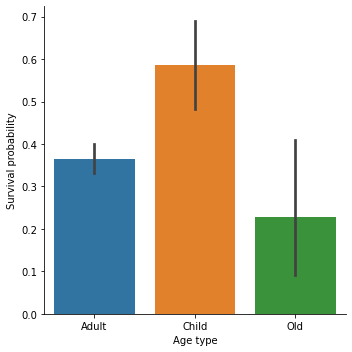

In [14]:
g = sns.factorplot(x='Age type',y='Survived',data=new_df,kind='bar')
g = g.set_ylabels("Survival probability")

In [15]:
df = new_df.copy()

## ANALYSING FAMILY

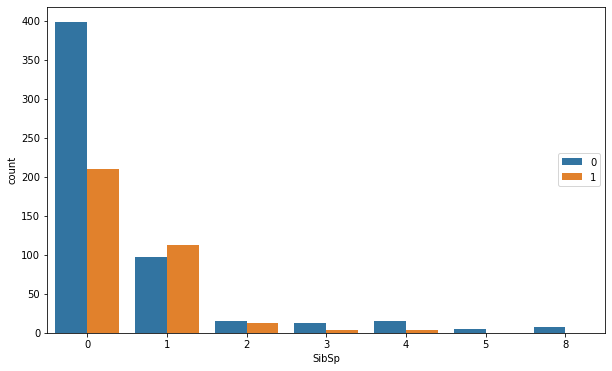

In [16]:
fig = plt.subplots(figsize=(10,6))
sns.countplot(x='SibSp',hue='Survived',data=df)
plt.legend(loc = 'right')

### SAGE family had a bad day 

In [17]:
df.loc[df['SibSp']==8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_extension,Title,Age type
159,0,3,"Sage, Master. Thomas Henry",male,5.0,8,2,CA. 2343,69.55,NaN,S,CA.,Master,Child
180,0,3,"Sage, Miss. Constance Gladys",female,22.0,8,2,CA. 2343,69.55,NaN,S,CA.,Miss,Adult
201,0,3,"Sage, Mr. Frederick",male,32.0,8,2,CA. 2343,69.55,NaN,S,CA.,Mr,Adult
324,0,3,"Sage, Mr. George John Jr",male,32.0,8,2,CA. 2343,69.55,NaN,S,CA.,Mr,Adult
792,0,3,"Sage, Miss. Stella Anna",female,22.0,8,2,CA. 2343,69.55,NaN,S,CA.,Miss,Adult
846,0,3,"Sage, Mr. Douglas Bullen",male,32.0,8,2,CA. 2343,69.55,NaN,S,CA.,Mr,Adult
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.0,8,2,CA. 2343,69.55,NaN,S,CA.,Miss,Adult


<AxesSubplot:xlabel='Parch', ylabel='count'>

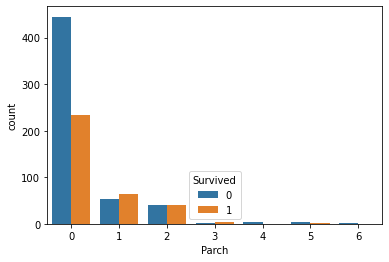

In [18]:
sns.countplot(x='Parch',hue='Survived',data=df)

### Goodwin family had a bad day 

In [19]:
df.loc[df['Parch']>5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_extension,Title,Age type
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,CA,Mrs,Adult


In [20]:
df.loc[df['Ticket_extension'] == 'CA']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_extension,Title,Age type
59,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,CA,Master,Child
71,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,CA,Miss,Adult
386,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,CA,Master,Child
480,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,CA,Master,Child
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,CA,Mrs,Adult
683,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,CA,Mr,Child


### Create a FAMILY SIZE section because we can see many people are travelling with families 

In [21]:
Sibsp = df['SibSp'].values
Parch = df['Parch'].values
family_size = np.add(Sibsp,Parch)

In [22]:
df['Family size'] = family_size

C:\Users\Akhilesh\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


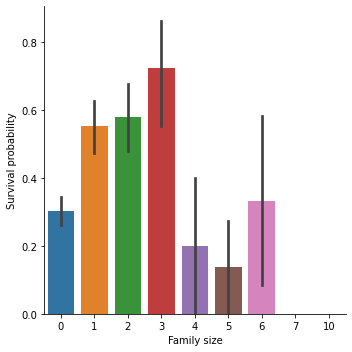

In [23]:
g = sns.factorplot(x='Family size',y='Survived',data=df,kind='bar')
g = g.set_ylabels("Survival probability")

In [24]:
df['Family remark'] = 0
df.loc[df['Family size'] == 0 ,'Family remark'] = 'No Family'
df.loc[df['Family size'].between(1,3),'Family remark'] = 'Small Family'
df.loc[df['Family size'].between(4,10),'Family remark'] = 'Large Family'

In [25]:
df.loc[df['Family size'] > 6]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_extension,Title,Age type,Family size,Family remark
59,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S,CA,Master,Child,7,Large Family
71,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S,CA,Miss,Adult,7,Large Family
159,0,3,"Sage, Master. Thomas Henry",male,5.0,8,2,CA. 2343,69.55,NaN,S,CA.,Master,Child,10,Large Family
180,0,3,"Sage, Miss. Constance Gladys",female,22.0,8,2,CA. 2343,69.55,NaN,S,CA.,Miss,Adult,10,Large Family
201,0,3,"Sage, Mr. Frederick",male,32.0,8,2,CA. 2343,69.55,NaN,S,CA.,Mr,Adult,10,Large Family
324,0,3,"Sage, Mr. George John Jr",male,32.0,8,2,CA. 2343,69.55,NaN,S,CA.,Mr,Adult,10,Large Family
386,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S,CA,Master,Child,7,Large Family
480,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S,CA,Master,Child,7,Large Family
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.90,NaN,S,CA,Mrs,Adult,7,Large Family
683,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,NaN,S,CA,Mr,Child,7,Large Family


C:\Users\Akhilesh\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


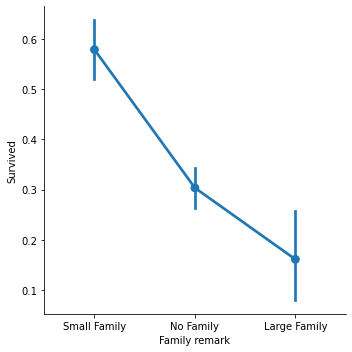

In [26]:
sns.factorplot(x='Family remark',y='Survived',data=df)

## ANALYSING FARE

<AxesSubplot:xlabel='Fare'>

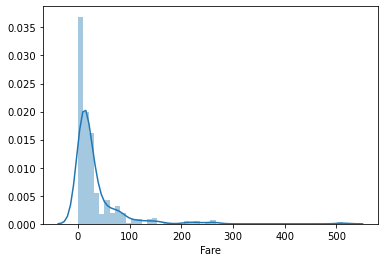

In [27]:
sns.distplot(df['Fare'])

In [28]:
df.loc[df['Fare'] > 300,'Cabin']

258            NaN
679    B51 B53 B55
737           B101
Name: Cabin, dtype: object

In [29]:
df.loc[df['Cabin'] == 'B51 B53 B55','Fare'].value_counts()

512.3292    1
5.0000      1
Name: Fare, dtype: int64

In [30]:
#Droping this values beacause cabin is same for lower value
df.drop([679,258,737],axis=0,inplace=True)

### Fortune family had fortune to spend

In [31]:
df.loc[df['Fare'] > 250]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_extension,Title,Age type,Family size,Family remark
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S,19950,Mr,Adult,5,Large Family
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S,19950,Miss,Adult,5,Large Family
311,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,PC,Miss,Adult,4,Large Family
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S,19950,Miss,Adult,5,Large Family
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S,19950,Mr,Old,5,Large Family
742,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,PC,Miss,Adult,4,Large Family


In [32]:
df.loc[df['Fare'].between(0,75),'Survived'].value_counts()

0    526
1    268
Name: Survived, dtype: int64

In [33]:
df.loc[df['Fare'].between(75,300),'Survived'].value_counts()

1    71
0    23
Name: Survived, dtype: int64

### Created a column based on range of Fare as people with high fare tends to survive 

In [34]:
df['Fare_range'] = 0
df.loc[df['Fare'].between(0,75),'Fare_range'] = 'Low Fare'
df.loc[df['Fare'].between(75,300),'Fare_range'] = 'High Fare'

C:\Users\Akhilesh\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


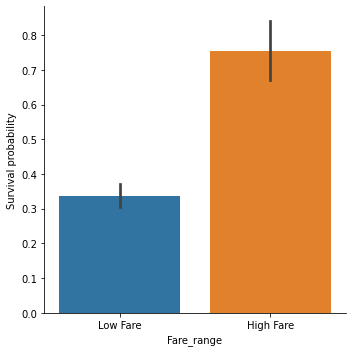

In [35]:
g = sns.factorplot(x='Fare_range',y='Survived',kind='bar',data=df)
g.set_ylabels('Survival probability')

### Checking fare range is having any relaton with other features

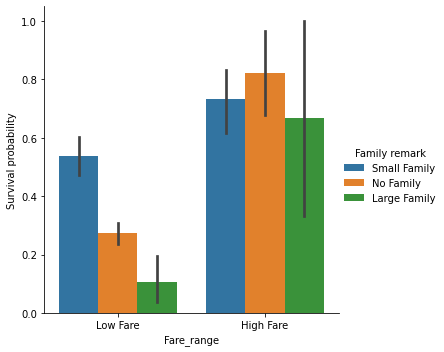

In [36]:
g =sns.factorplot(x='Fare_range',y='Survived',hue='Family remark',kind='bar',data=df)
g.set_ylabels('Survival probability')

## Analysing Cabin

In [37]:
new_df = df.copy()

In [38]:
df['Cabin'].isna().mean()

0.7725225225225225

### This indicates relation beween NA values and Cabin
#### We can create Cabin remark indicating where passnger had a cabin or not.Type of cabin is not a good meausre to find survival rate as we have Fare range to indicate that

In [39]:
#Finding realtion between NA values
df.loc[df['Cabin'].isna(),'Fare_range'].value_counts()

Low Fare     673
High Fare     13
Name: Fare_range, dtype: int64

In [40]:
df['Cabin remark'] = 0
df.loc[df['Cabin'].isna(),'Cabin remark'] = 'No Cabin'
df.loc[~df['Cabin'].isna(),'Cabin remark'] = 'With Cabin'

In [41]:
new_df = df.copy()
df.loc[new_df['Embarked'].isna(),'Ticket_extension']

61     113572
829    113572
Name: Ticket_extension, dtype: object

In [42]:
df.loc[df['Ticket_extension']=='113572']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_extension,Title,Age type,Family size,Family remark,Fare_range,Cabin remark
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,113572,Miss,Adult,0,No Family,High Fare,With Cabin
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,113572,Mrs,Old,0,No Family,High Fare,With Cabin


In [43]:
df.drop([61,829],axis=0,inplace=True)

In [44]:
new_df['Cabin'].fillna('No cabin',inplace=True)

In [45]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_extension,Title,Age type,Family size,Family remark,Fare_range,Cabin remark
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,Mr,Adult,1,Small Family,Low Fare,No Cabin
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,Mrs,Adult,1,Small Family,Low Fare,With Cabin
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,Miss,Adult,0,No Family,Low Fare,No Cabin
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,113803,Mrs,Adult,1,Small Family,Low Fare,With Cabin
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,373450,Mr,Adult,0,No Family,Low Fare,No Cabin


# SELECTING FEATURES

C:\Users\Akhilesh\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


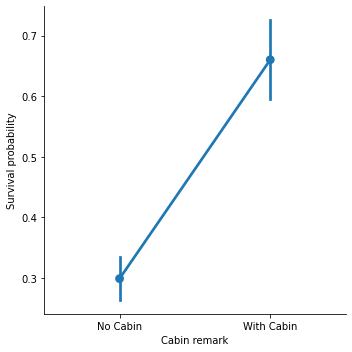

In [46]:
g =sns.factorplot(x='Cabin remark',y='Survived',data=df)
g.set_ylabels('Survival probability')

C:\Users\Akhilesh\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


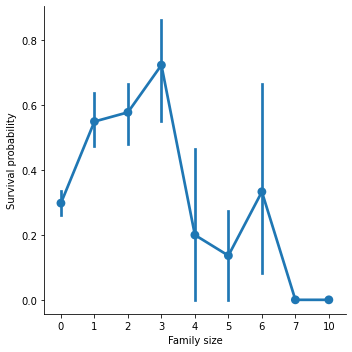

In [47]:
g =sns.factorplot(x='Family size',y='Survived',data=df)
g.set_ylabels('Survival probability')

C:\Users\Akhilesh\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


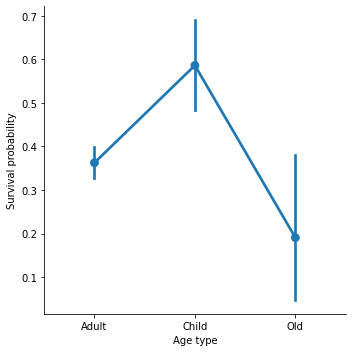

In [48]:
g =sns.factorplot(x='Age type',y='Survived',data=df)
g.set_ylabels('Survival probability')

C:\Users\Akhilesh\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


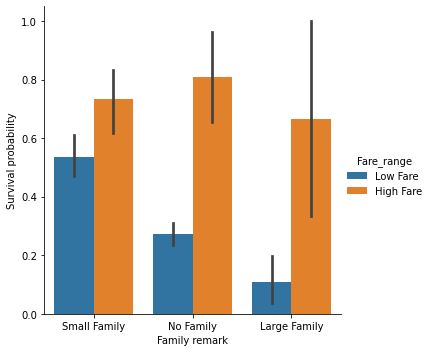

In [49]:
g =sns.factorplot(x='Family remark',y='Survived',hue='Fare_range',kind='bar',data=df)
g.set_ylabels('Survival probability')

In [50]:
df.shape

(886, 18)

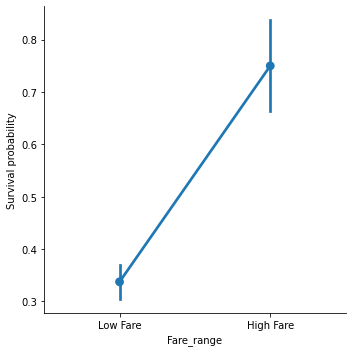

In [51]:
g =sns.factorplot(x='Fare_range',y='Survived',data=df)
g.set_ylabels('Survival probability')

In [66]:
df2 = df[['Sex','Age type','Cabin remark','Fare_range','Title']]
Pclass = pd.get_dummies(df['Pclass'])
Family_size = pd.get_dummies(df['Family size'])
X1 = pd.get_dummies(df2)

In [68]:
X = pd.concat([Pclass,Family_size,X1],axis=1)
X = X.reset_index(drop=True)
X

,1,2,3,0,1,2,3,4,5,6,...,Age type_Old,Cabin remark_No Cabin,Cabin remark_With Cabin,Fare_range_High Fare,Fare_range_Low Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
882,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
883,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
884,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [69]:
X_data = X.values

In [70]:
Y = df['Survived']
Y = Y.reset_index(drop=True)
Y

0      0
1      1
2      1
3      1
4      0
      ..
881    0
882    1
883    0
884    1
885    0
Name: Survived, Length: 886, dtype: int64

In [71]:
Y_data = Y.values

# APPLYING ML ALGOS

In [59]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()
np.cumsum(pca.explained_variance_ratio_)

NameError: name 'pca' is not defined

<Figure size 720x720 with 0 Axes>

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_data,Y_data,test_size=0.25,random_state=3)

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 15)]
max_depth = [int(x) for x in np.linspace(5, 30, num = 2)]
learning_rate= [0.01,0.03,0.05,0.07,0.09,0.1]
colsample_bytree = [0.1,0.2,0.3,0.4,0.5]
subsample = [0.6,0.7,0.8,0.9,1]
reg_lambda= [2,3,4,5,6,7,8,9,10,11,12]
param = {      'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'colsample_bytree' : colsample_bytree,
                'subsample': subsample,
                'reg_lambda':reg_lambda
        }

clf = RandomizedSearchCV(Xgb,param,cv=5,n_iter=25,random_state=2)

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [74]:
Rns = RandomForestClassifier(n_estimators=250,max_features=0.2)
Rns.fit(X_train,y_train)
y_pred1 = Rns.predict(X_train)
y_pred2 = Rns.predict(X_test)
accuracy_score(y_train,y_pred1),accuracy_score(y_test,y_pred2)

(0.8403614457831325, 0.8468468468468469)

In [75]:
import xgboost as xgb

In [76]:
Xgb = xgb.XGBClassifier(learning_rate=0.1,random_state=2)
Xgb.fit(X_train,y_train)
y_pred1 = Xgb.predict(X_train)
y_pred2 = Xgb.predict(X_test)
accuracy_score(y_train,y_pred1),accuracy_score(y_test,y_pred2)

(0.8373493975903614, 0.8558558558558559)

In [77]:
import pickle
filename = '..\Models\Model3.sav'
pickle.dump(Rns,open(filename,'wb'))